## Import Key Librairies: 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

> ## Import Algorithms:

In [2]:
from sklearn import datasets, linear_model #Sklearn is a gold mine to do Machine Learning.
from sklearn.metrics import mean_squared_error

> ## Import A Data Set & Describe It:

In [3]:
from sklearn.datasets import load_diabetes
#Here we define which data set.

In [4]:
diabetes=load_diabetes()
#Here we install the data set.

In [5]:
diabetes.keys()# Here we want to find out about the attributes of the data set.

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [6]:
print (diabetes.DESCR) # Here we want a description of the data set.

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [7]:
#Here, we want to see the data set attributes
#Note that Python starts at 0 and not 1.
print (diabetes.feature_names)
print (diabetes.data[0:3])
print (diabetes.target[0:3])


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]
[151.  75. 141.]


In [8]:
#Here we transform our data set into a Pandas dataframe with rows and columns; this is because Pandas will allow us to do further transformations later on. 
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


> ## Define The Value We Want To Predict:

In [9]:
#Here we explicitly define our target or dependent variable and we allocate it to a series which is a one-column dataframe.
# Our target variable is a value that measures the degree of diabetes progression. 
df_diabetes['target'] = pd.Series(diabetes.target) 
y = diabetes.target

> ## Explore The Data Set:

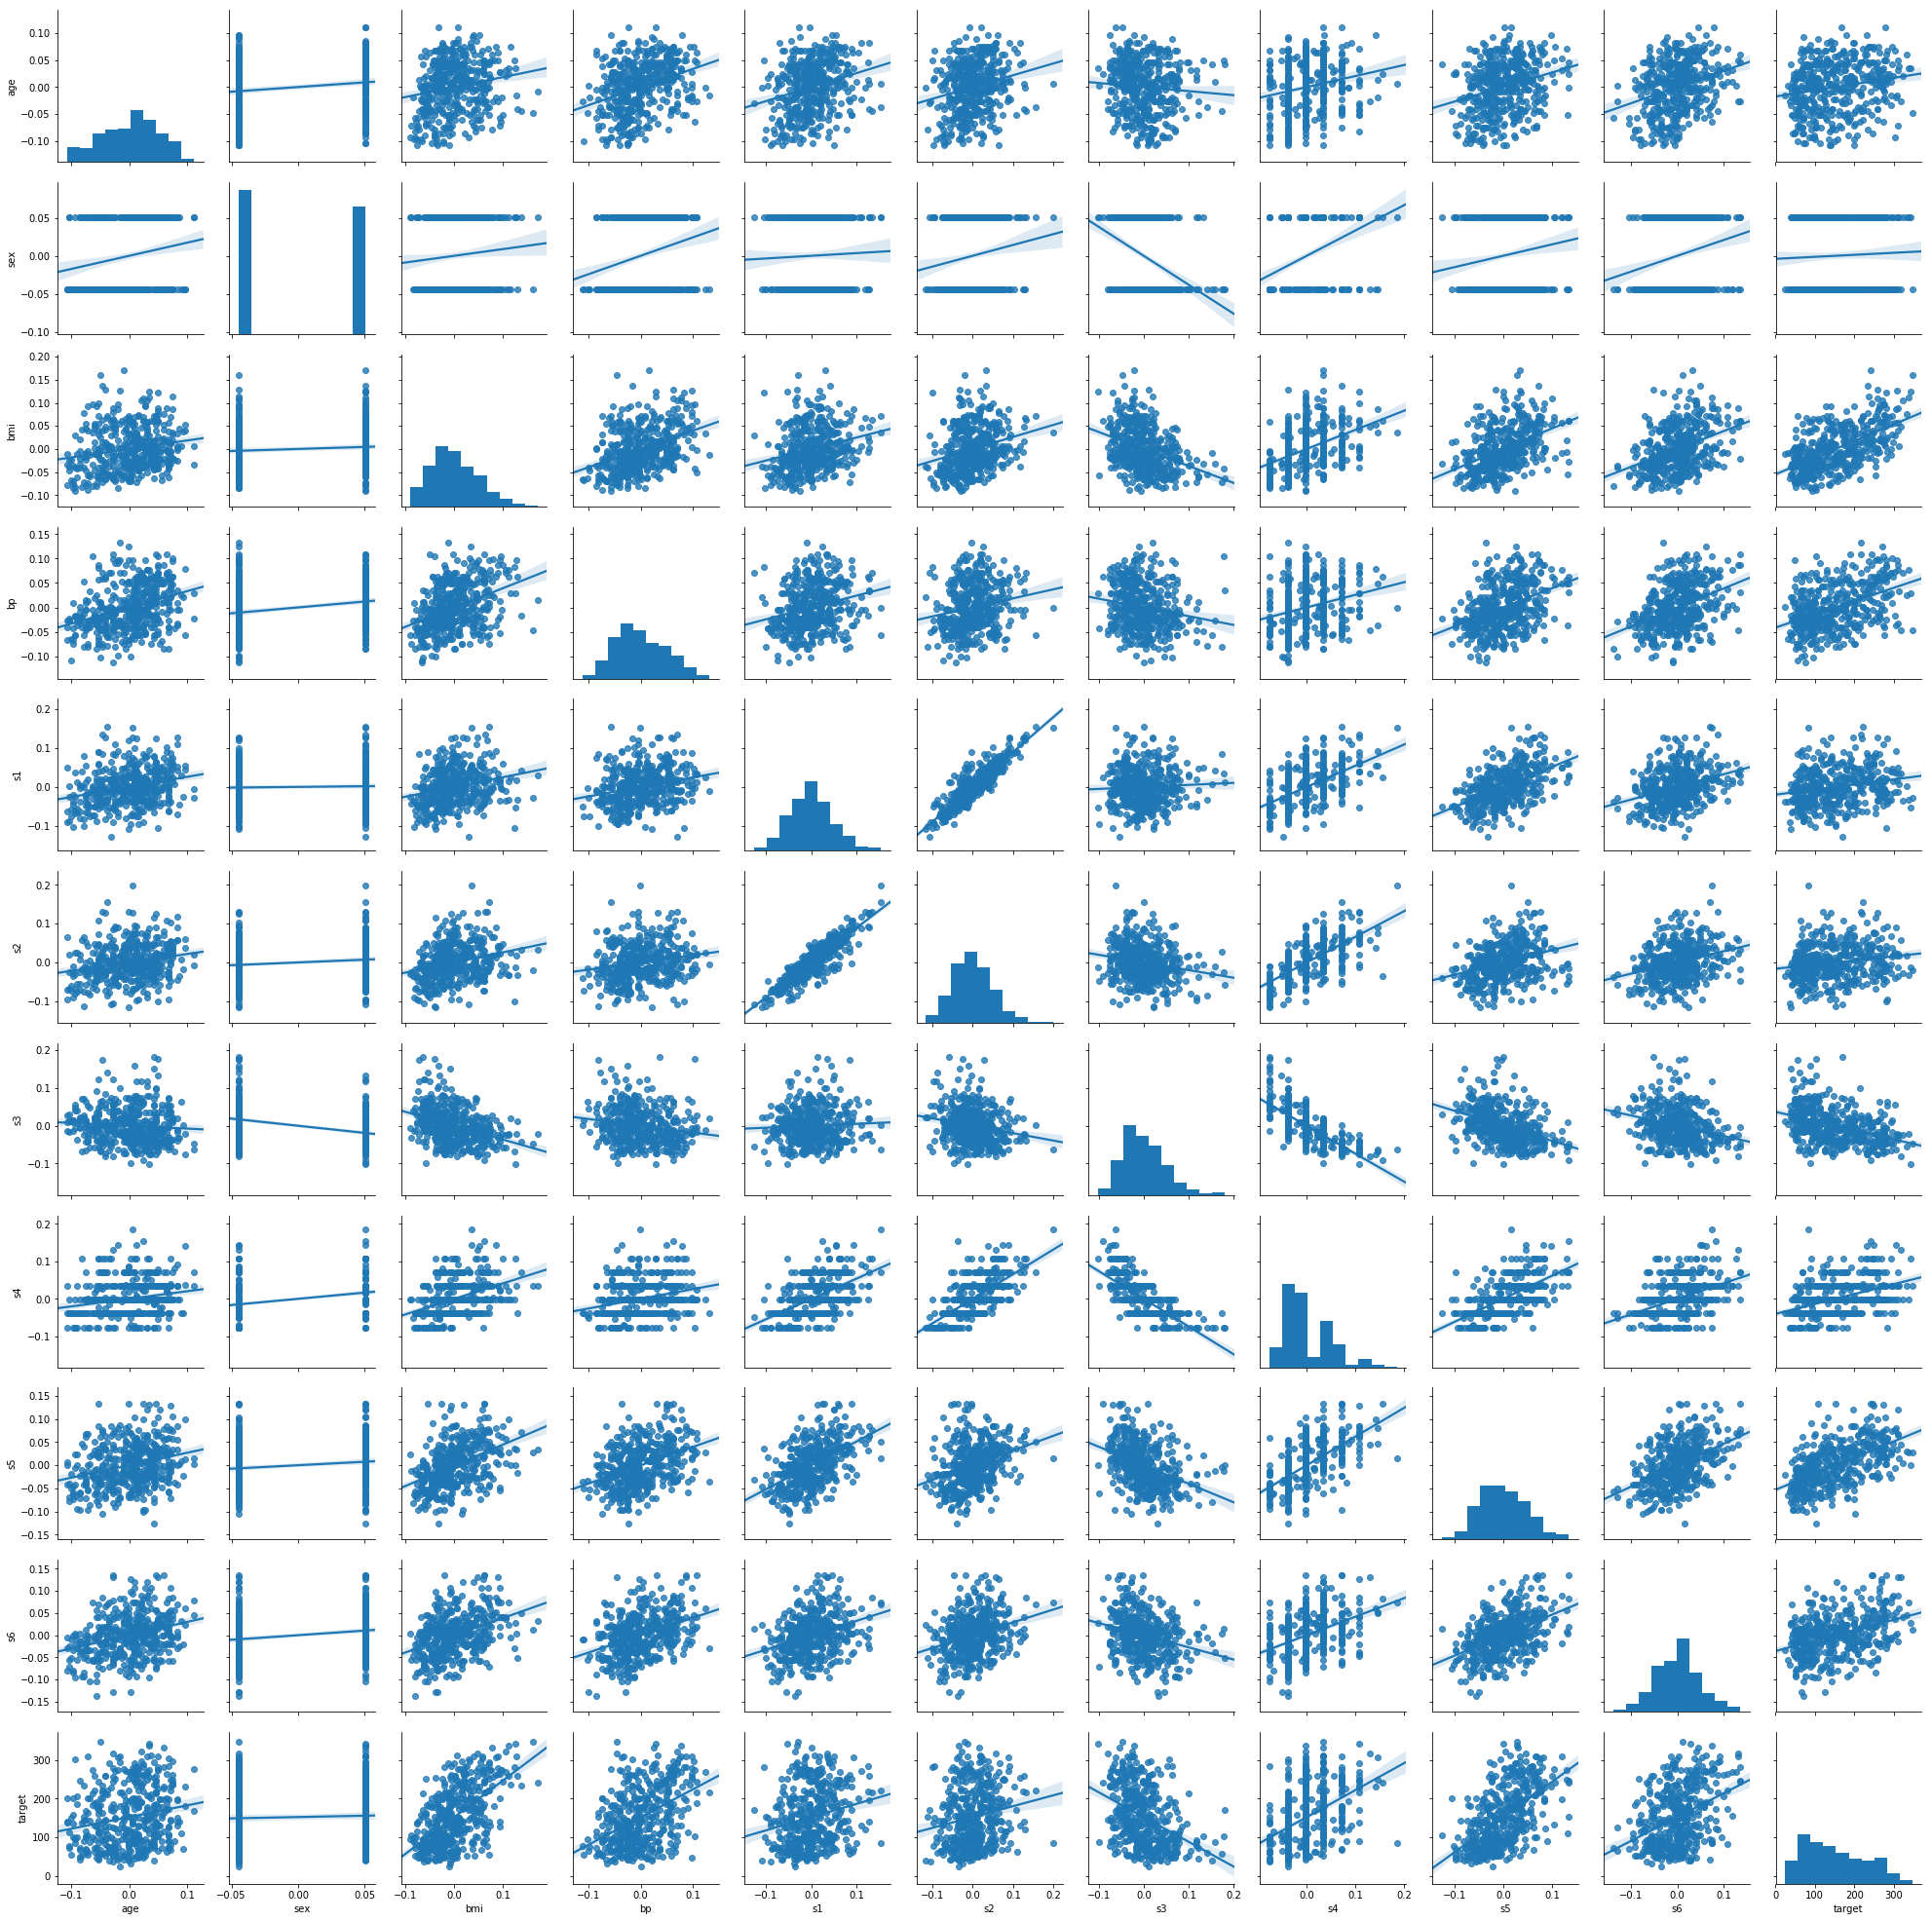

In [10]:
#Let's explore correlation and linearity between all the variables. 
sns.pairplot(df_diabetes, kind="reg")

In [11]:
# We want to explore our data set
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Training Phase - Define X and y:

In [12]:
#Define X and y. 
X=diabetes.data
y=diabetes.target

## Training Phase - Import Training Libary:

In [13]:
from sklearn.model_selection import train_test_split 

**This is where the learning part of Machine Learning starts taking place!**

Also notice **split**: this will allow us to split our data set in two parts: one part will **train** and **learn** from the data set.
Once this first phase of training and learning is done, the model will **apply its learning to the second part of the data set and test** whether the learning from the first phase can be replicated to a new set of values and **predict accurately**.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [17]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)



(353, 10)
(89, 10)
(353,)
(89,)


## Define And Install A Specific Model On The Data Set ##

In [27]:
# We create one instance of the linear regression model and we call it lm1.
lm1 = linear_model.LinearRegression()

X = diabetes.data
y = diabetes.target 
#We fit our model onto our training data set.
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate And Interpret The Model - Coefficients and Intercept: ##

In [29]:
#Interpret the coefficients
print (diabetes.feature_names)
print (lm1.coef_)
# Ageing by one year results in an increase of 37 in the diabetes progression index.
# An increase in bmi by 1 index point results in an increase of 542 in the diabetes progression index.

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


In [20]:
#Interpret the intercept of the model
print (lm1.intercept_)
#Ignoring all the independent variables from the model, we learn that the diabetes rogression index is of 151.

151.3456553477407


> ## Evaluate And Interpret The Model - Look At Predictions On The Test Values:

In [21]:
#We define our prediction set:
pred1 = lm1.predict(X_test)
#We show the predicted values for the dependent varaible based on the independent values from the test data set
print(lm1.predict(X_test[0:10]))

[139.5483133  179.52030578 134.04133298 291.41193598 123.78723656
  92.17357677 258.23409704 181.33895238  90.22217862 108.63143298]


## Evaluate And Interpret The Model - Model Accuracy:

In [22]:
#We print the model's error
print (np.sqrt(mean_squared_error(y_test, pred1)))

53.8532569849144


## Evaluate And Interpret The Model - Model Accuracy:

In [23]:
score1=lm1.score(X_test,y_test)
print (score1)


0.452606602161738


## Evaluate And Interpret The Model - Compare Our Model with A Baseline Model:

In [24]:
#In linear regression, a popular baseline model is a model that predicts the mean value for the dependent variable. 
baseline=np.mean(y_test)
baseline



145.77528089887642

In [25]:
#We create a new array wit the same shape as the shape of our test values
baseline_pred=np.empty(len(y_test))
#We fill this new array with the predicted values from the baseline model - so all the values will be 145.
baseline_pred.fill(baseline)
#We calculate the error of the baseline model
print(np.sqrt(mean_squared_error(y_test,baseline_pred)))

72.78840394263774


In [30]:
#Here we show the test values and the predicted values from the baseline model. 
print(y_test, baseline_pred)


[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.] [145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809